In [95]:
import importlib
import torch
from torchvision import transforms
from torch import nn, optim
import torch.nn.functional as F

from utils import layers, hooking, img, stats, models, losses, shift
from stepping import loss, closure

In [96]:
vgg = models.vgg19()

In [97]:
vgg

Sequential(
  (0): Normalization()
  (1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (2): ReLU(inplace)
  (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU(inplace)
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU(inplace)
  (8): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): ReLU(inplace)
  (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (11): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (12): ReLU(inplace)
  (13): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (14): ReLU(inplace)
  (15): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (16): ReLU(inplace)
  (17): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (18): ReLU(inplace)
  (19): MaxPool2d(kernel_size=

In [98]:
hooker = hooking.Hooker(vgg)
hooker.attach_hooks("texture_hooks", [19])
hook_bag = hooker.get_bag()
vgg = layers.clipped_model(vgg, hooker.last_hooked_index())

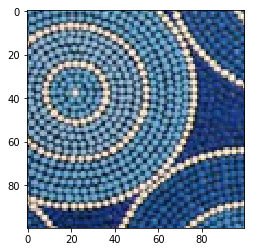

In [99]:
transform = transforms.Compose([
    transforms.RandomCrop(100),
    transforms.ToTensor(),
])

example_texture = img.image_loader("data/original/rings-2.jpg", transform)
img.show_image(example_texture)

In [100]:
importlib.reload(losses)
importlib.reload(stats)
importlib.reload(shift)


vgg(example_texture)
target = stats.extract_features(hook_bag.get_hook("texture_hooks"), stats.deep_correlation_matrix)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 256, 12, 12])
torch.Size([1, 3, 12, 12])


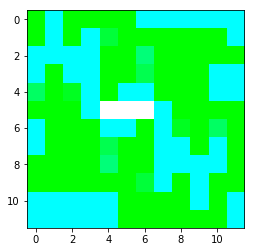

In [110]:
img.show_image(target[0][:, :3] * 700)
print(target[0].size())
print(target[0][:, :3].size())

In [111]:
dcorr_loss = loss.LossFn(target, hook_bag.get_hook("texture_hooks"), losses.deep_correlation_loss) 

In [112]:
collector = loss.LossCollector()
collector.add_loss_fn("texture", dcorr_loss)

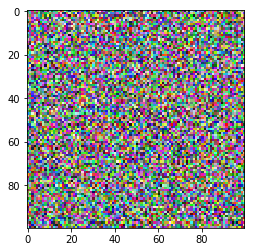

In [113]:
sample_texture = img.random_image(1, 100)
img.show_image(sample_texture)

inputs = {
    "input": sample_texture,
    "loss_name": "texture",
    "pyramid": False,
}

optimizer = optim.LBFGS([sample_texture])

In [114]:
stepper = closure.Stepper(inputs, vgg, collector, optimizer)

In [115]:
importlib.reload(stats)
importlib.reload(losses)

show_at = 1
for i in range(30):
    optimizer.step(stepper.loss_fn)
    
    img.save_image(sample_texture, "data/synth/lol{}.jpg".format(i))
    print(sample_texture.grad[0][0][0][:3])

tensor(198391424., device='cuda:0', grad_fn=<AddBackward>)
tensor(198167088., device='cuda:0', grad_fn=<AddBackward>)
tensor(179870608., device='cuda:0', grad_fn=<AddBackward>)
tensor(162634976., device='cuda:0', grad_fn=<AddBackward>)
tensor(114963128., device='cuda:0', grad_fn=<AddBackward>)
tensor(23108054., device='cuda:0', grad_fn=<AddBackward>)
tensor(103008928., device='cuda:0', grad_fn=<AddBackward>)
tensor(14736024., device='cuda:0', grad_fn=<AddBackward>)
tensor(12295134., device='cuda:0', grad_fn=<AddBackward>)
tensor(11900452., device='cuda:0', grad_fn=<AddBackward>)
tensor(8689633., device='cuda:0', grad_fn=<AddBackward>)
tensor(7617378.5000, device='cuda:0', grad_fn=<AddBackward>)
tensor(7403666., device='cuda:0', grad_fn=<AddBackward>)
tensor(7194438., device='cuda:0', grad_fn=<AddBackward>)
tensor(7043465., device='cuda:0', grad_fn=<AddBackward>)
tensor(6736881.5000, device='cuda:0', grad_fn=<AddBackward>)
tensor(6407587., device='cuda:0', grad_fn=<AddBackward>)
tensor(

tensor(3074155., device='cuda:0', grad_fn=<AddBackward>)
tensor(3095763.5000, device='cuda:0', grad_fn=<AddBackward>)
tensor(3221007.7500, device='cuda:0', grad_fn=<AddBackward>)
tensor(3101747.7500, device='cuda:0', grad_fn=<AddBackward>)
tensor(3052809.2500, device='cuda:0', grad_fn=<AddBackward>)
tensor(2957625., device='cuda:0', grad_fn=<AddBackward>)
tensor(2796701., device='cuda:0', grad_fn=<AddBackward>)
tensor(2733907.5000, device='cuda:0', grad_fn=<AddBackward>)
tensor(2710529.7500, device='cuda:0', grad_fn=<AddBackward>)
tensor([117250.4219, 114936.8516, 189145.5000], device='cuda:0')
tensor(2777393.2500, device='cuda:0', grad_fn=<AddBackward>)
tensor(3032506.7500, device='cuda:0', grad_fn=<AddBackward>)
tensor(3137716.2500, device='cuda:0', grad_fn=<AddBackward>)
tensor(3105707., device='cuda:0', grad_fn=<AddBackward>)
tensor(3016957.5000, device='cuda:0', grad_fn=<AddBackward>)
tensor(3099803.7500, device='cuda:0', grad_fn=<AddBackward>)
tensor(3467934.7500, device='cuda:0'

tensor(6369985.5000, device='cuda:0', grad_fn=<AddBackward>)
tensor(6571589.5000, device='cuda:0', grad_fn=<AddBackward>)
tensor(6871336., device='cuda:0', grad_fn=<AddBackward>)
tensor(6880328., device='cuda:0', grad_fn=<AddBackward>)
tensor(5895073., device='cuda:0', grad_fn=<AddBackward>)
tensor(7581205.5000, device='cuda:0', grad_fn=<AddBackward>)
tensor(6962383., device='cuda:0', grad_fn=<AddBackward>)
tensor(7529655.5000, device='cuda:0', grad_fn=<AddBackward>)
tensor(8032102., device='cuda:0', grad_fn=<AddBackward>)
tensor(7782880., device='cuda:0', grad_fn=<AddBackward>)
tensor(6679037.5000, device='cuda:0', grad_fn=<AddBackward>)
tensor(7359110., device='cuda:0', grad_fn=<AddBackward>)


KeyboardInterrupt: 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


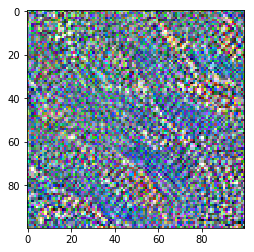

In [47]:
img.show_image(sample_texture)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 128, 25, 25])
torch.Size([1, 3, 25, 25])


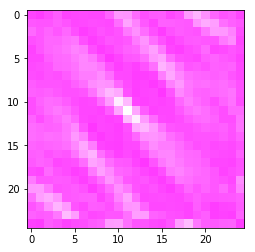

In [46]:
vgg(sample_texture)
t = stats.extract_features(hook_bag.get_hook("texture_hooks"), stats.deep_correlation_matrix)
img.show_image(t[0][:, :3] /  30)
print(target[0].size())
print(target[0][:, :3].size())